In [ ]:
import random
from datetime import datetime
import numpy as np
import pandas as pd
import random as rd

In [ ]:

name = ['central_square','flipkart','Amazon','Meesho','shopsy','Temple_square','Yummy_shop','Myntra']
name = rd.choices(name,k =100)
used_method = ['finger print','pattern','face recognition','pin']
used_method = rd.choices(used_method,k = 100)
transaction_type = ['UPI','credit_card','Debit_card']
transaction_type = rd.choices(transaction_type, k = 100)
No_of_times = ['1','2','3','4','5','6','7','8','9','10']
No_of_times = rd.choices(No_of_times,k =100)
fraud = ['0','1']
fraud = rd.choices(fraud,k =100)



amount = np.random.randint(25,50,100)
#date = [np.random.randint(0, (end_date - start_date).days) + start_date for _ in range(100)]
#time =time(0,0,random.randint(0,86399)).strftime('%H:%M:%S')
#fraud =random.choice(['0', '1'])

data  = {

    'Name' : name,
    'Amount' :  amount,
    #'Date' :date,
    #'Time' : time,
    'Fraud' : fraud,
    'Used_method' : used_method,
    'Transaction_type':transaction_type,
    'No_of_times':No_of_times


}
df = pd.DataFrame(data)
df.head(15)

,Name,Amount,Fraud,Used_method,Transaction_type,No_of_times
0,Meesho,48,0,finger print,UPI,4
1,Amazon,42,1,pin,UPI,3
2,Yummy_shop,28,0,finger print,Debit_card,4
3,flipkart,44,0,pattern,Debit_card,9
4,Yummy_shop,30,0,face recognition,credit_card,6
5,Yummy_shop,26,0,pin,Debit_card,6
6,Temple_square,49,1,face recognition,UPI,8
7,central_square,43,0,pattern,credit_card,1
8,Myntra,26,0,pin,credit_card,3
9,Temple_square,32,1,face recognition,Debit_card,4


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(100, 15)

In [ ]:
df.columns

Index(['Name', 'Amount', 'Fraud', 'Used_method', 'Transaction_type',
       'No_of_times'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['Name','Transaction_type','Used_method'])


In [ ]:
df.isnull().sum()

Amount                          0
Fraud                           0
Used_method                     0
No_of_times                     0
Transaction_type_Debit card     0
Transaction_type_UPI            0
Transaction_type_credit card    0
Name_Amazon                     0
Name_Meesho                     0
Name_Myntra                     0
Name_Temple square              0
Name_Yummy shop                 0
Name_central square             0
Name_flipkart                   0
Name_shopsy                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Amount                        100 non-null    int64 
 1   Fraud                         100 non-null    object
 2   Used_method                   100 non-null    object
 3   No_of_times                   100 non-null    object
 4   Transaction_type_Debit card   100 non-null    uint8 
 5   Transaction_type_UPI          100 non-null    uint8 
 6   Transaction_type_credit card  100 non-null    uint8 
 7   Name_Amazon                   100 non-null    uint8 
 8   Name_Meesho                   100 non-null    uint8 
 9   Name_Myntra                   100 non-null    uint8 
 10  Name_Temple square            100 non-null    uint8 
 11  Name_Yummy shop               100 non-null    uint8 
 12  Name_central square           100 non-null    uint8 
 13  Name_flipkart        

In [ ]:
df.describe()

,Amount
count,100.000000
mean,35.710000
std,7.082907
min,25.000000
25%,29.000000
50%,35.000000
75%,42.000000
max,48.000000


In [ ]:
df.nunique()

Name                 8
Amount              23
Fraud                1
Used_method          4
Transaction_type     3
No_of_times          1
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['Name'].unique()

array(['shopsy', 'Myntra', 'Meesho', 'Temple_square', 'Yummy_shop',
       'Amazon', 'central_square', 'flipkart'], dtype=object)

In [ ]:
df['Name'].value_counts()

Yummy_shop        17
Meesho            16
Amazon            16
shopsy            15
Myntra            13
central_square    12
Temple_square      8
flipkart           3
Name: Name, dtype: int64

In [ ]:
df['Transaction_type'].unique()

array(['credit_card', 'Debit_card', 'UPI'], dtype=object)

In [ ]:
df['Transaction_type'].value_counts()

credit_card    40
Debit_card     33
UPI            27
Name: Transaction_type, dtype: int64

In [ ]:
df['Used_method'].unique()

array(['pattern', 'pin', 'face recognition', 'finger print'], dtype=object)

In [ ]:
df['Used_method'].value_counts()

pin                 30
finger print        26
face recognition    23
pattern             21
Name: Used_method, dtype: int64

In [ ]:
X = df.drop('Fraud', axis=1)
y = df['Fraud']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
y_train = y_train.to_numpy()

In [ ]:
for i in No_of_times:
  if int(i) < 5:
    print("Transaction  is successful")
  else:
    print('Fraud')

Transaction  is successful
Transaction  is successful
Transaction  is successful
Fraud
Fraud
Fraud
Fraud
Transaction  is successful
Transaction  is successful
Transaction  is successful
Transaction  is successful
Transaction  is successful
Transaction  is successful
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Transaction  is successful
Transaction  is successful
Transaction  is successful
Transaction  is successful
Fraud
Fraud
Fraud
Fraud
Fraud
Fraud
Transaction  is successful
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Transaction  is successful
Fraud
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Fraud
Fraud
Transaction  is successful
Fraud
Fraud
Fraud
Transaction  is successful
Transaction  is successful
Fraud
Transaction  is successful
Transaction  is successful
Fraud
Transactio

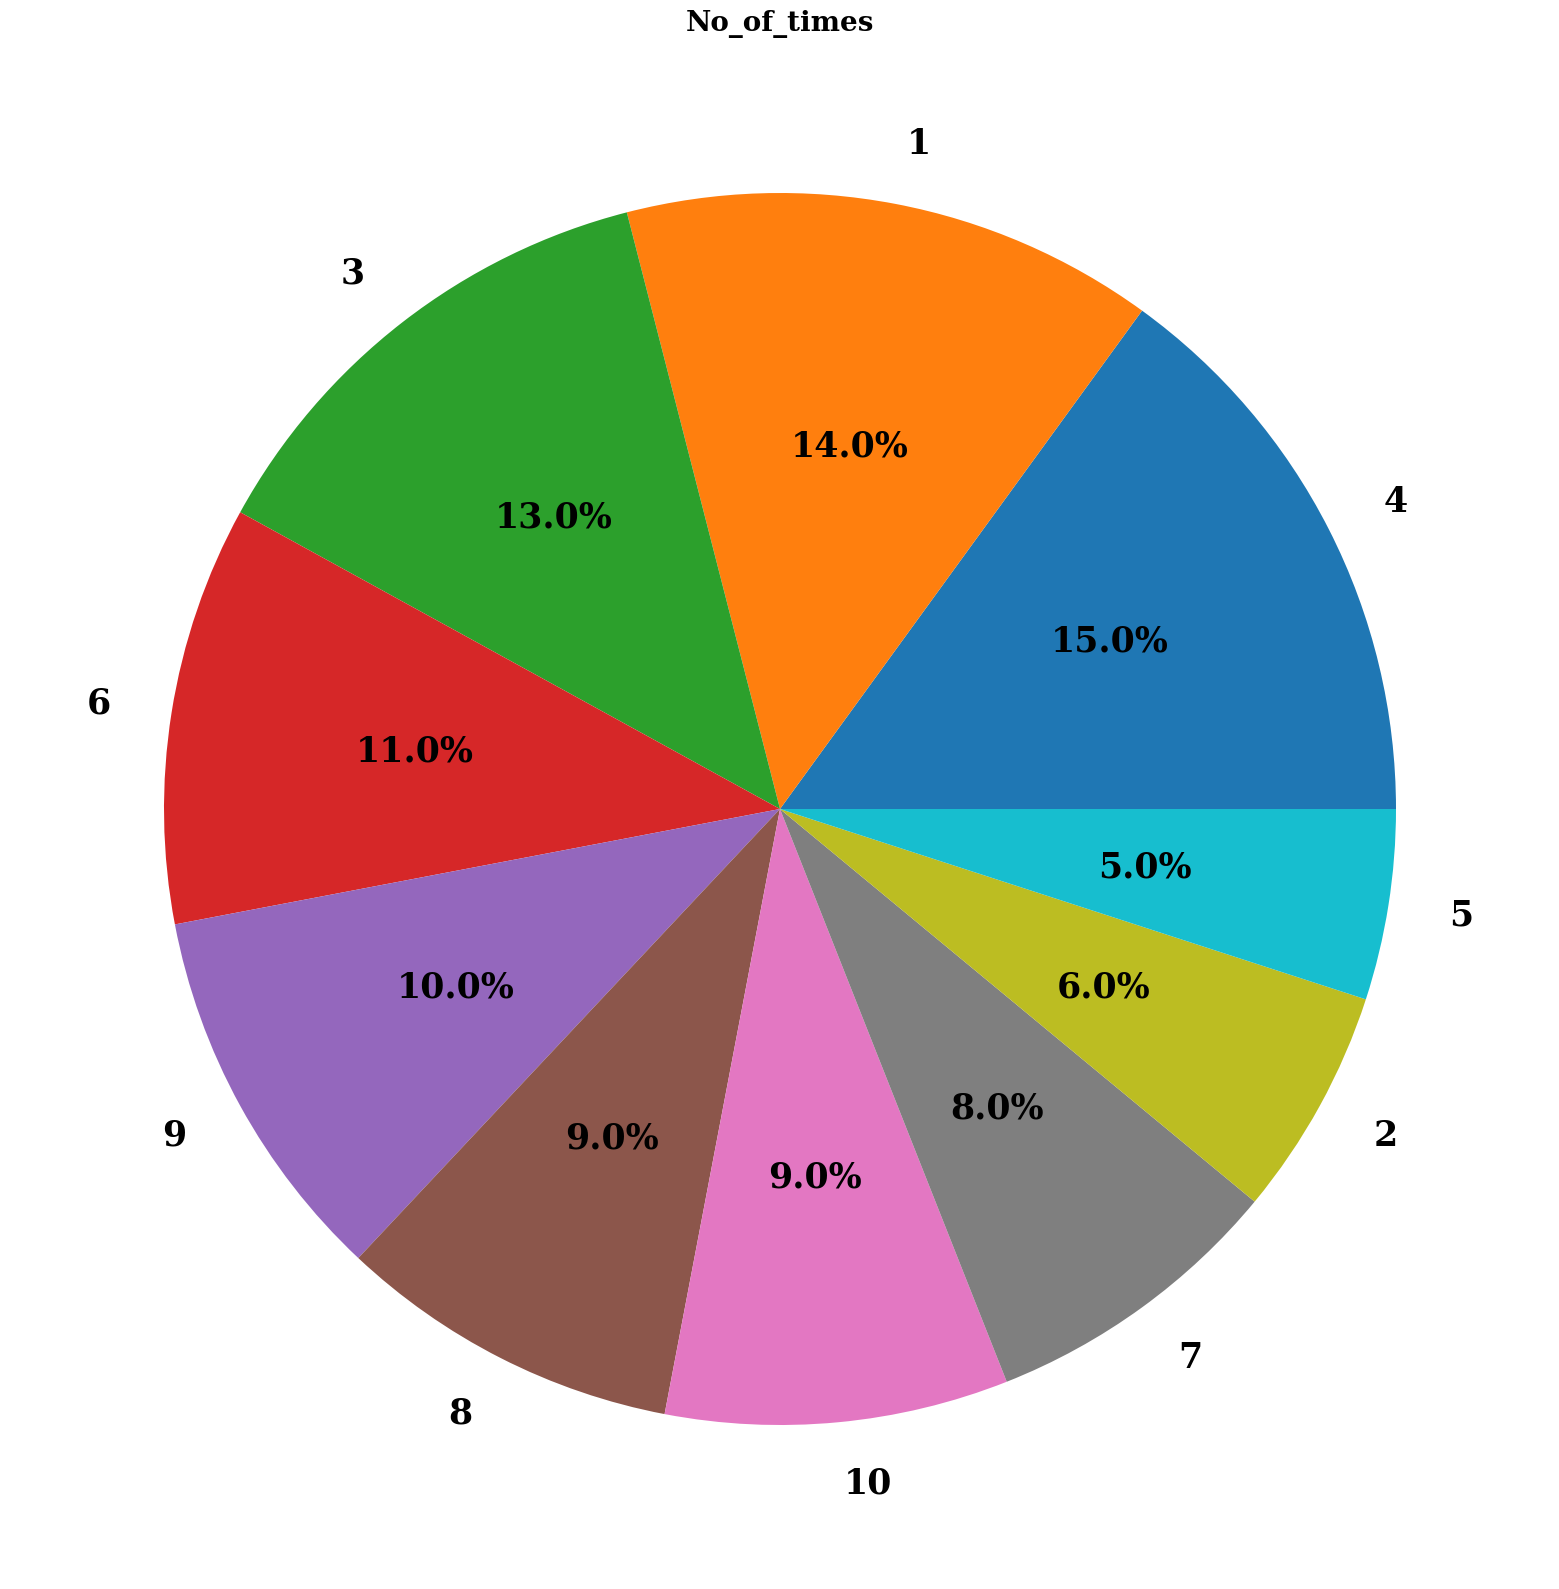

In [ ]:
plt.figure(figsize=(30,20))
plt.pie(df['No_of_times'].value_counts(), labels=df['No_of_times'].value_counts().index, autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('No_of_times', size=20, **hfont)
plt.show()